# Complexity Analysis

*Performance* refers to how fast our code run; we've been measuring it and thinking about it at an intuitive level.  *Complexity analysis* is a formal theory for thinking about some aspects of performance.

Here are a few things that often affect performance:
* speed of the computer (CPU, etc)
* speed of Python interpreter (quality+efficiency of interpretation)
* algorithm: strategy for solving the problem
* input size: how much data do we have?

Computers and the Python interpreters that run our programs may tend to get faster over time, and our code will run faster as a result.

Complexity analysis is interested only in those last two parts and the relationship between them.  *How much work does a given algorithm need to do to complete a task, as a function of the input size?*

An *algorithm* is a bit more general than code.  It's a description of the steps that must be performed to complete the task.  We might *implement" an algorithm in different languages.  For example, here's an algorithm for finding the biggest number in a list:

<pre>
Take a list, and set x to be the first item in that list.
Iterate over each item in the list, putting each value in y:
    if y is bigger than x, then set x equal to y
Output x, as the biggest number in the list
</pre>

We could convert that to Python code:

In [1]:
nums = [5,3,2,9,8]
x = nums[0]
for y in nums:
    if y > x:
        x = y
x

9

The algorithm is more general than this specific Python code -- you could imagine implementing the same algorithm in the code of another programming language (C, Go, JavaScript, etc).

Complexity analysis is interested in how much "work" needs to be done, as the "input size" increases.  We'll postpone talking about how to measure "work" in terms of "steps."  Input size can be defined on a case-by-case basis.  Here, we could say the input size is $N$, where `N = len(nums)`.  We could also use other variable names (though N is most common), or multiple variables.  For other algorithms, there might be other ways to measure the input size that make more sense, like the size of a file, length of a string, or number of entries in a dictionary.

## Big O

Big-O notation is a mathematical way of communicating how quickly the outputs of a function grow as the inputs grow.  This will be useful because we will eventually have functions like $y = f(x)$, where $f$ is a function that tells us how much work our algorithm must do ($y$ will be the number of "steps" -- defined later; $x$ will be the size of the input, such as the length of a list).

Big-O notation allows us to broadly categorize functions into sets, so we'll use set notation.  For example, $f(x) \in O(N^2)$ means that the $f$ function is in the $O(N^2)$ set (to be defined soon).  Confusingly, other resources you might find use the notation $f(x) = O(N^2)$, replacing the $\in$ with $=$.

Big-O sets are fairly broad.  For example, all straight lines belong to the same set.  Lets see this intuitively before we give a definition:

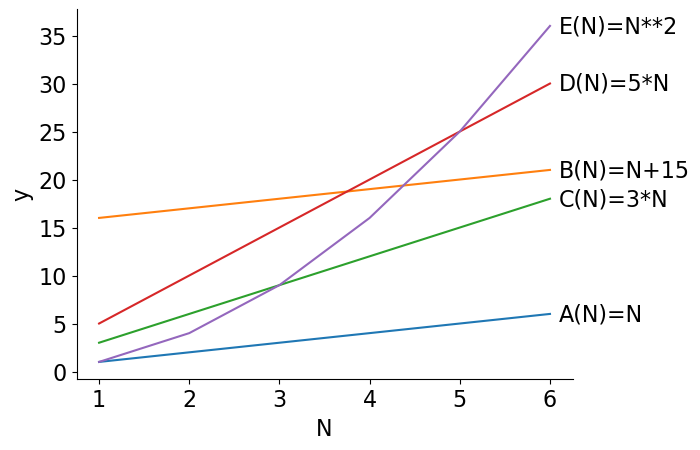

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 16

# add functions to DataFrame
df = pd.DataFrame({"N": range(1, 7)})
df["A(N)=N"] = df["N"]
df["B(N)=N+15"] = df["N"] + 15
df["C(N)=3*N"] = 3 * df["N"]
df["D(N)=5*N"] = 5 * df["N"]
df["E(N)=N**2"] = df["N"] ** 2
df.set_index("N", inplace=True)

# plot functions A to E
ax = df.plot.line()
ax.set_ylabel("y")

# clean up plot...
for label, y in df.iloc[-1].items():
    ax.text(6.1, y, label, va="center")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_legend().remove()

Even though function B and C are "bigger" than function A, Big O will categorize them as being in the same set of functions, as they are all the same shape (straight lines).  Big-O notation **does not care** about the following:

* if you add a fixed amount to a function (for example, line B is just line A shifted up)
* if you multiple a function by a constant (for example, line C is just line A multiplied by 3)

To formalize this a bit, Big-O analysis says if we want to claim function $y=f(x)$ belongs to the same set as as $y=g(x)$, we can multiply the g function by some constant to create a new function, then show that $y=f(x)$ is beneath the new function.  For example, line D is line A multiplied by a constant (in this case 5, though we could have chosen any constant we liked).  E is above line C, therefore C is in the same complexity set as A.  We're also allowed to only look at large N values (above a threshold of our choosing), so B is also in the same complexity set as A because the B line is beneath the E line for all N values of 4 or greater.

In contrast, E is not beneath line D.  Of course, we could have used a different constant multiple on the A line to produce the D line, such as $D(N) = 999999*N$.  However, it doesn't matter what constant we use.  We'll still end up with a straight line, and no matter how steep it is, the E line will eventually surpass it because E's line keeps getting steeper and steeper.  E is NOT in A's complexity class -- it's y values fundamentally grow faster as N increases.

Let's write a more precise mathematical definition to capture this intuition:

**Definition:** If $f(N) \le C * g(N)$ for large N values and some fixed constant C, then $f(N) \in O(g(N))$.

How does categorizing functions into complexity classes/set relate to algorithm performance?  Let's look at the previous plot again, with some new labels:

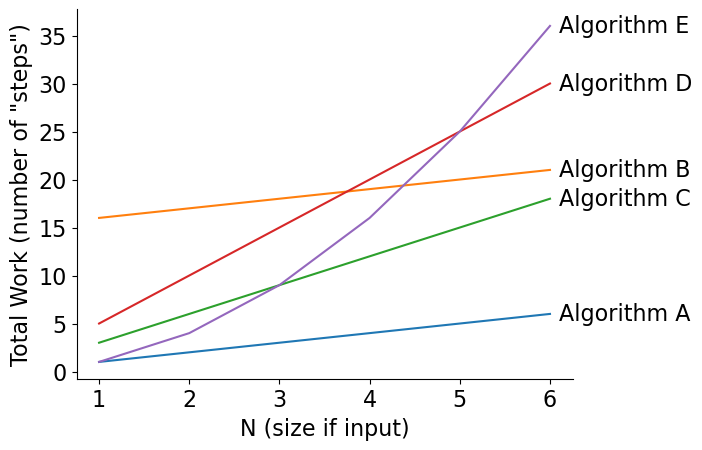

In [3]:
# add functions to DataFrame
df = pd.DataFrame({"N": range(1, 7)})
df["Algorithm A"] = df["N"]
df["Algorithm B"] = df["N"] + 15
df["Algorithm C"] = 3 * df["N"]
df["Algorithm D"] = 5 * df["N"]
df["Algorithm E"] = df["N"] ** 2
df.set_index("N", inplace=True)

# plot functions A to E
ax = df.plot.line()
ax.set_ylabel('Total Work (number of "steps")')
ax.set_xlabel("N (size if input)")

# clean up plot...
for label, y in df.iloc[-1].items():
    ax.text(6.1, y, label, va="center")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_legend().remove()

Each function corresponds to an algorithm and tells us how many "steps" (defined next) the algorithm will need to perfom in order to complete a task, given an input size.

## Steps

In the above section, you may be wondering why you would want to classify function/algorithm A as having the same computational complexity as function/algorithm B.  Isn't B much slower because it does more steps?  Not necessarily: it turns out there's not one correct way to count steps, and it's allowed for some steps to be slower than others.  Our only restriction is as follows:

**Definition:** A *step* is any unit of work with bounded execution time (it doesn't keep getting slower and slower with growing input size).

For example, for a piece of code that takes the average of the odd numbers in a list, we could break it down into 4 steps as possible:

<img src="good-steps1.png" align="left" width=400><br>

How long it takes to execute that third might depend on whether a number is even or odd, but it's *bounded*.  As the size of `input_nums` grows and grows, it won't keep getting slower and slower to execute that step once (that step will execute more times, but that's a separate point).

If there are N=10 (where N is `len(input_nums)`), then a total of $1+11+10+1$ steps will execute total.  In general, $f(N) = 2*N + 3$ gives the number of steps that will executed for a given input length.

Here's an example of an illegitimate way to identify steps:

<img src="bad-steps.png" align="left" width=400>

Going back to the definition, that second box surrounds a snippet of code that keeps "getting slower will growing input size."  The execution time to *run that snippet once* is not bounded, so it's not a single step.

Let's consider an anthor valid way to identify steps:

<img src="good-steps2.png" align="left" width=400>

Here, the number of steps that execute depends on whether the numbers are odd or even.  If all are odd, and $N=10$, there will be $1+11+10+10+1=33$ steps.  If all are even, there will be $1+11+10+1=23$.  Unless specified otherwise, we'll be doing *worst case analysis*, so we'll go with $f(N) = 3*N + 3$.

Notice that this $f(N)$ is different than the function we got when we counted steps differently in the first example ($f(N) = 3*N + 3$), even though both approaches to counting steps were legitimate.  Fortunately, it's all good, because both $f$ functions are in the $O(N)$ complexity class.

Let's consider some more examples:

In [4]:
nums = [1, 3, 4, 2, 5, 3, 6, 4]

In [5]:
# example 1: O(N)
x = 3
x in nums

True

The above `x in nums` snippet in $O(N)$.  Even though it's one line of code, that one line is not a single step, as Python essentially loops over all numbers looking for 3.

In this case, Python will quickly find 3 at index 1 and stop, but for complexity analysis, we want to think about what happens in the worst case for different `nums` lists.  The list might not even contain the number we're looking for, so Python might need to check every entry.

In [6]:
# example 2: O(1)
total = 0
for x in nums[:100]:
    total += x
x

4

It's not common to find loops in O(1) code, but in this case, the execution time is bounded.  After `len(nums) > 100`, the code won't keep getting slower and slower as the list grows, because it only looks at the first 100.

In [7]:
# example 3: O(N**2)
for i in range(len(nums)):
    for j in range(len(nums)):
        if i != j and nums[i] == nums[j]:
            print("duplicate!")

duplicate!
duplicate!
duplicate!
duplicate!


Here, we're looping over every pair of numbers in the list.  If there are N numbers, there are N numbers, there are $N^2$ pairs.

In [8]:
# example 4: O(N**2)

# part 1: filter to odd numbers
odds = []
for x in nums:
    if x % 2 == 1:
        odds.append(x)

# part 2: are there any duplicates among our odd numbers?
for i in range(len(odds)):
    for j in range(len(odds)):
        if i != j and odds[i] == odds[j]:
            print("duplicate!")

duplicate!
duplicate!


Here, we have two phases, the first of which is $O(N)$, and the second of which is $O(N^2)$.  Together, it is $O(N + N^2)$, which is actually the same as $O(N^2)$ (a better answer since it is simpler).  